 Used Car Price Predictor
 
 Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Analysiing and cleaning

In [52]:
# loading dataset
df = pd.read_csv('C:/Users/HP/Desktop/car final.csv')

In [53]:
# inspecting the first 5 rows of the dataframe
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [54]:
# checking the number of rows and columns
df.shape

(301, 9)

In [55]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


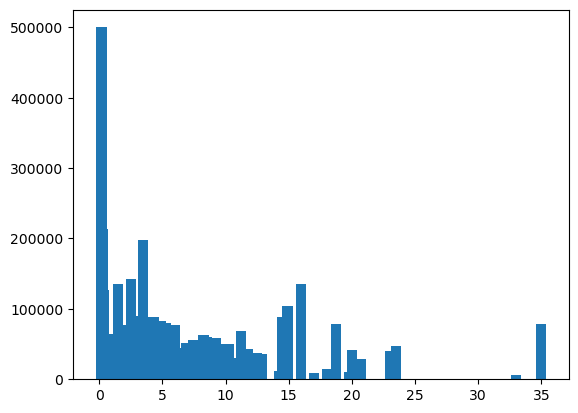

In [56]:
plt.bar (x=df [ 'Selling_Price' ], height=df [ 'Kms_Driven' ])
plt.show ()

In [57]:
# checking the number of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     2
Owner            0
dtype: int64

In [7]:
#Analyzing Null Values

In [58]:
df["Transmission"].unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [59]:
df.Transmission.fillna(method="bfill",inplace=True)

In [60]:
df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [61]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [62]:
print(df.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [63]:
print(df.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [64]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [65]:
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [66]:
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [67]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [68]:
#dropping irrelevant columns
X = df.drop(['Car_Name','Selling_Price'],axis=1)


In [69]:
#storing target field seperately
Y = df['Selling_Price']

In [70]:
#data to be used for analysis
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [71]:
#target data
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

Model Training

1. Linear Regression

In [73]:
# loading the linear regression model
lr = LinearRegression()

In [74]:
lr.fit(X_train,Y_train)

LinearRegression()

Evaluation

In [75]:
# prediction on Training data
training_data_prediction = lr.predict(X_train)

In [76]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8829881212564382


Visualize the actual prices and Predicted prices

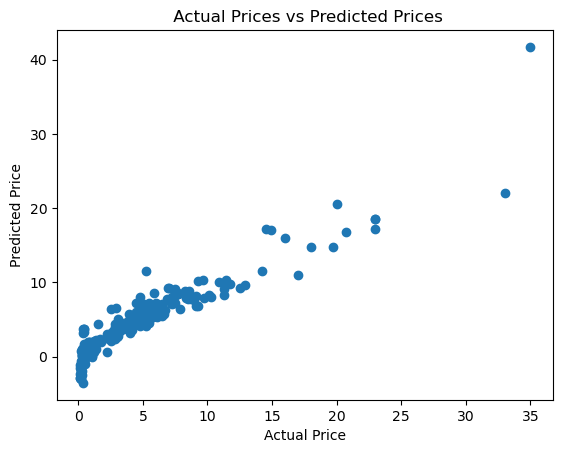

In [77]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [78]:
# prediction on Testing data
test_data_prediction = lr.predict(X_test)

In [79]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8431862844784653


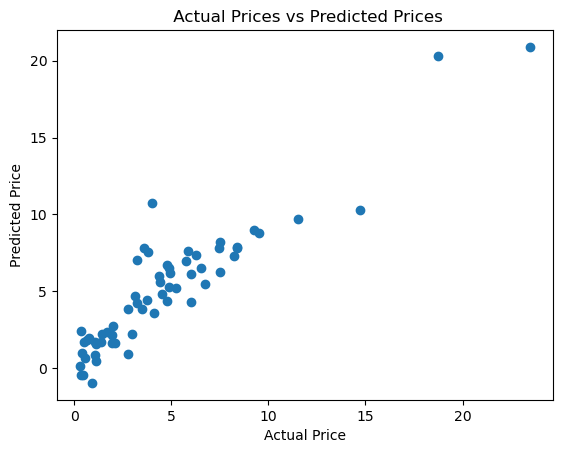

In [80]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()